In [2]:
import geopandas as gpd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random

In [5]:
gdf = gpd.GeoDataFrame()

In [14]:
from geopandas import GeoSeries, GeoDataFrame, points_from_xy
gdf['Longitude'] = [random.uniform(-180,180) for _ in range(100)]
gdf['Latitude'] = [random.uniform(-180,180) for _ in range(100)]
gdf['Coordinates'] = points_from_xy(gdf.Longitude, gdf.Latitude)
gdf.head()


,Longitude,Latitude,Coordinates
0,-174.838964,61.240774,POINT (-174.839 61.241)
1,-65.503055,-157.675052,POINT (-65.503 -157.675)
2,-33.203658,-27.034931,POINT (-33.204 -27.035)
3,-57.126750,24.210778,POINT (-57.127 24.211)
4,-94.858872,111.959420,POINT (-94.859 111.959)


In [15]:
from geopandas import GeoSeries
from shapely.geometry import Point


# Decide a center point 
city_center= GeoSeries([Point(0, 0)])
distance_to_park = GeoSeries([Point(10, 10)])

# Calculate distance to park and city center
gdf['dist_to_center'] = gdf['Coordinates'].distance(city_center.geometry[0])
gdf['dist_to_park'] = gdf['Coordinates'].distance(distance_to_park.geometry[0])

In [16]:
gdf.head()

,Longitude,Latitude,Coordinates,dist_to_center,dist_to_park
0,-174.838964,61.240774,POINT (-174.839 61.241),185.254138,191.809956
1,-65.503055,-157.675052,POINT (-65.503 -157.675),170.739780,183.890278
2,-33.203658,-27.034931,POINT (-33.204 -27.035),42.817875,56.904676
3,-57.126750,24.210778,POINT (-57.127 24.211),62.045366,68.614480
4,-94.858872,111.959420,POINT (-94.859 111.959),146.741669,146.256988


In [25]:
import numpy as np

# Define a coefficient for determining the house value
coef = 100000000

# Determine the house value inversely proportional to the specified distances
gdf['house_value'] = coef / (gdf['dist_to_center'] + gdf['dist_to_park'] + np.random.rand(len(gdf)))

gdf['house_value'] = gdf['house_value'].astype(int)
print(gdf.head())


    Longitude    Latitude               Coordinates  dist_to_center  \
0 -174.838964   61.240774   POINT (-174.839 61.241)      185.254138   
1  -65.503055 -157.675052  POINT (-65.503 -157.675)      170.739780   
2  -33.203658  -27.034931   POINT (-33.204 -27.035)       42.817875   
3  -57.126750   24.210778    POINT (-57.127 24.211)       62.045366   
4  -94.858872  111.959420   POINT (-94.859 111.959)      146.741669   

   dist_to_park  house_value  
0    191.809956       264624  
1    183.890278       281379  
2     56.904676      1000136  
3     68.614480       763901  
4    146.256988       340888  


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [48]:
x = gdf[['dist_to_center','dist_to_park']]
y = gdf['house_value']


In [49]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [50]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 1189632.264281978
Coefficients: [-3827.64320086 -1356.10129987]


In [51]:
gdf['predicted_house_value'] = model.predict(x)

In [52]:
gdf.head()

,Longitude,Latitude,Coordinates,dist_to_center,dist_to_park,house_value,predicted_house_value
0,-174.838964,61.240774,POINT (-174.839 61.241),185.254138,191.809956,264624,220431.791777
1,-65.503055,-157.675052,POINT (-65.503 -157.675),170.739780,183.890278,281379,286727.461630
2,-33.203658,-27.034931,POINT (-33.204 -27.035),42.817875,56.904676,1000136,948572.210810
3,-57.126750,24.210778,POINT (-57.127 24.211),62.045366,68.614480,763901,859096.557400
4,-94.858872,111.959420,POINT (-94.859 111.959),146.741669,146.256988,340888,429618.222128


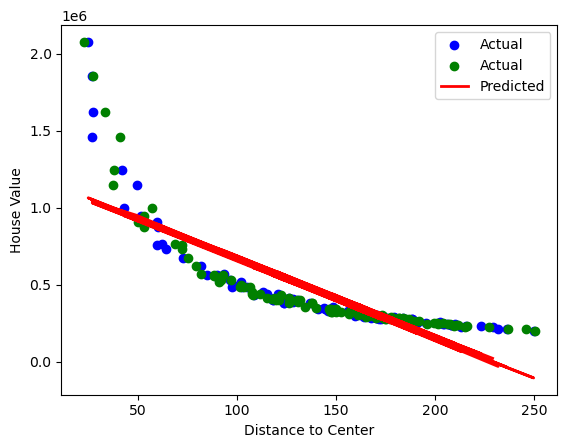

In [54]:
# Visualize the results
plt.scatter(gdf['dist_to_center'], gdf['house_value'], color='blue', label='Actual')
plt.scatter(gdf['dist_to_park'], gdf['house_value'], color='green', label='Actual')
plt.plot(gdf['dist_to_center'], gdf['predicted_house_value'], color='red', linewidth=2, label='Predicted')
plt.xlabel('Distance to Center')
plt.ylabel('House Value')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error

# Gerçek ve tahmin edilen değerleri kullanarak MSE'yi hesapla
mse = mean_squared_error(gdf['house_value'], gdf['predicted_house_value'] )
mse


36394462615.45716

In [58]:
import geopandas as gpd
from sklearn.svm import SVR
import matplotlib.pyplot as plt


# Define the features (independent variables) and the target variable
X = gdf[["dist_to_center", "dist_to_park"]]
y = gdf["house_value"]

# Create an SVM model
model = SVR(kernel='rbf')  # RBF kernel is commonly used

# Train the model
model.fit(X, y)

# Predict house values using the trained model
gdf['predicted_house_value'] = model.predict(X)

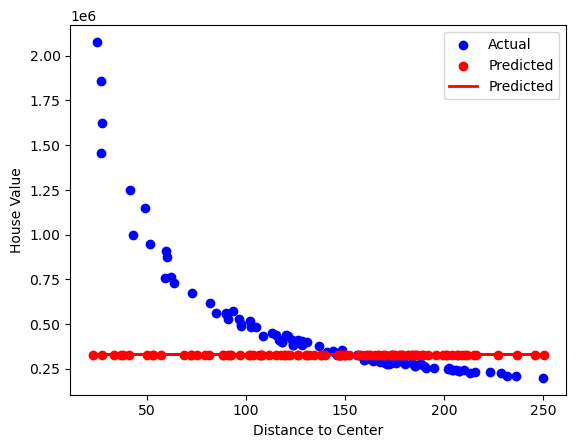

In [59]:
# Visualize the results
plt.scatter(gdf['dist_to_center'], gdf['house_value'], color='blue', label='Actual')
plt.scatter(gdf['dist_to_park'], gdf['predicted_house_value'], color='red', label='Predicted')
plt.plot(gdf['dist_to_center'], gdf['predicted_house_value'], color='red', linewidth=2, label='Predicted')
plt.xlabel('Distance to Center')
plt.ylabel('House Value')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error

# Gerçek ve tahmin edilen değerleri kullanarak MSE'yi hesapla
mse = mean_squared_error(gdf['house_value'], gdf['predicted_house_value'] )
mse


128139828797.92455

In [76]:
import folium
from folium.plugins import MarkerCluster

# OpenStreetMap haritasını oluştur
m = folium.Map(location=[gdf['Latitude'].mean(), gdf['Longitude'].mean()], zoom_start=12)

# Ev konumlarını haritaya ekleyin
marker_cluster = MarkerCluster().add_to(m)
for index, row in gdf.iterrows():
    folium.Marker(
        location=[gdf['Latitude'].mean(), gdf['Longitude'].mean()],
        popup='House ID: {}'.format(index+1),
        icon=folium.Icon(color='blue', icon='home')
    ).add_to(m)

# Haritayı görüntüle
m


In [78]:
gdf.to_csv("dataset.csv", index=False)

